<a href="https://colab.research.google.com/github/JuanJoseMA2020/BigData/blob/main/JUAN_JOSE_MAZO_ACEVEDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taller 2 (10%) BIG DATA

HOTEL BOOKINGS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
import matplotlib.pyplot as plt 
font = {'size'   : 14}
import matplotlib
matplotlib.rc('font', **font)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [102]:
df=pd.read_csv("/content/drive/MyDrive/Ingeniería de Sistemas/2023-1/BigData/hotel_bookings.csv", sep=";")
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/07/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/07/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,3/07/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,3/07/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,6/05/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22/04/2015


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [166]:
df['hotel']=df['hotel'].astype('category')#Categorización
df['meal']=df['meal'].astype('category')#Categorización 
df['country']=df['country'].astype('category')#Categorización
df['distribution_channel']=df['distribution_channel'].astype('category')#Categorización 
df['reserved_room_type']=df['reserved_room_type'].astype('category')#Categorización
df['assigned_room_type']=df['assigned_room_type'].astype('category')#Categorización
df['deposit_type']=df['deposit_type'].astype('category')#Categorización
df['customer_type']=df['customer_type'].astype('category')#Categorización
df['reservation_status']=df['reservation_status'].astype('category')#Categorización
#df['is_canceled']=df['is_canceled'].astype('category')#Categorización
df['babies']=df['babies'].astype('category')#Categorización
df['market_segment']=df['market_segment'].astype('category')#Categorización

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119390 non-null  category
 1   is_canceled                     119390 non-null  int64   
 2   lead_time                       119390 non-null  int64   
 3   arrival_date_year               119390 non-null  int64   
 4   arrival_date_month              119390 non-null  object  
 5   arrival_date_week_number        119390 non-null  int64   
 6   arrival_date_day_of_month       119390 non-null  int64   
 7   stays_in_weekend_nights         119390 non-null  int64   
 8   stays_in_week_nights            119390 non-null  int64   
 9   adults                          119390 non-null  int64   
 10  children                        119386 non-null  float64 
 11  babies                          119390 non-null  int64   
 12  me

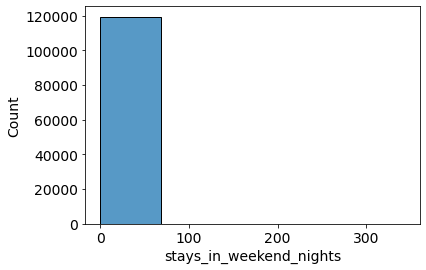

In [64]:
sns.histplot(data=df,x='stays_in_weekend_nights',bins=5);

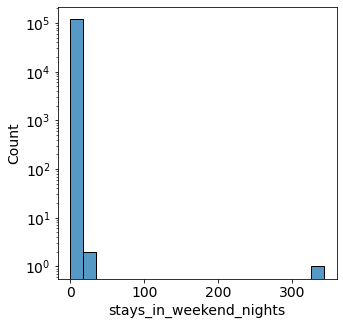

In [65]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
sns.histplot(data=df,x='stays_in_weekend_nights',bins=20);
ax.set_yscale('log')

1. Revise si hay valores atípicos en la columna "noches en fin de semana"


R/= Puede observarse que en ambos tipos de gráficas, tenemos un alto cesgo hacia la izquierda, en donde se ven muchos datos en valores de cero, lo que indica que en los fines de semana sobre todo en las noches no se quedan en el hotel las personas que hacen las resevas

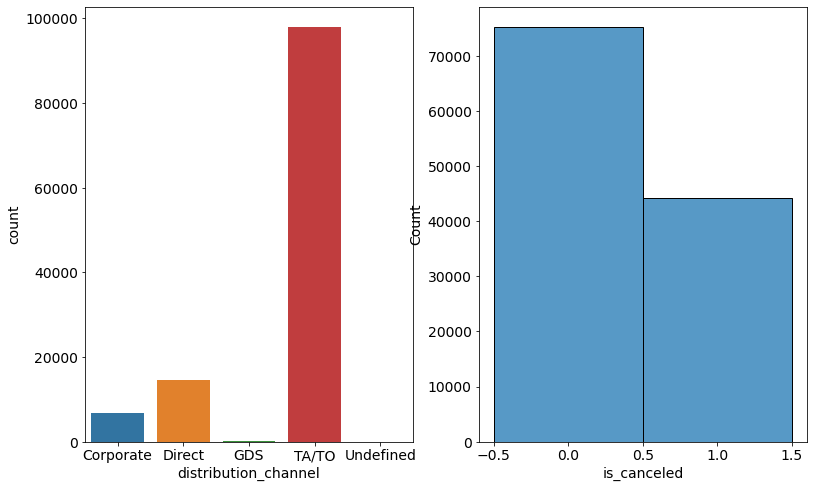

In [135]:
fig=plt.figure(figsize=(20,8))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)


sns.countplot(data=df,x='distribution_channel', ax=ax1) 
sns.histplot(data=df,x='is_canceled', ax=ax2, bins=1) 


2. Realice un comparativo entre las reservas NO CANCELADAS por canal de distribución. 



R/= Con base a la información dada, el TA/TO ayudó a que las cancelaciones no se vieran elevadas en la campaña presentada por el hotel.

Realice un gráfico que permita revisar las reservas canceladas y no canceladas con relación al mes del año. 

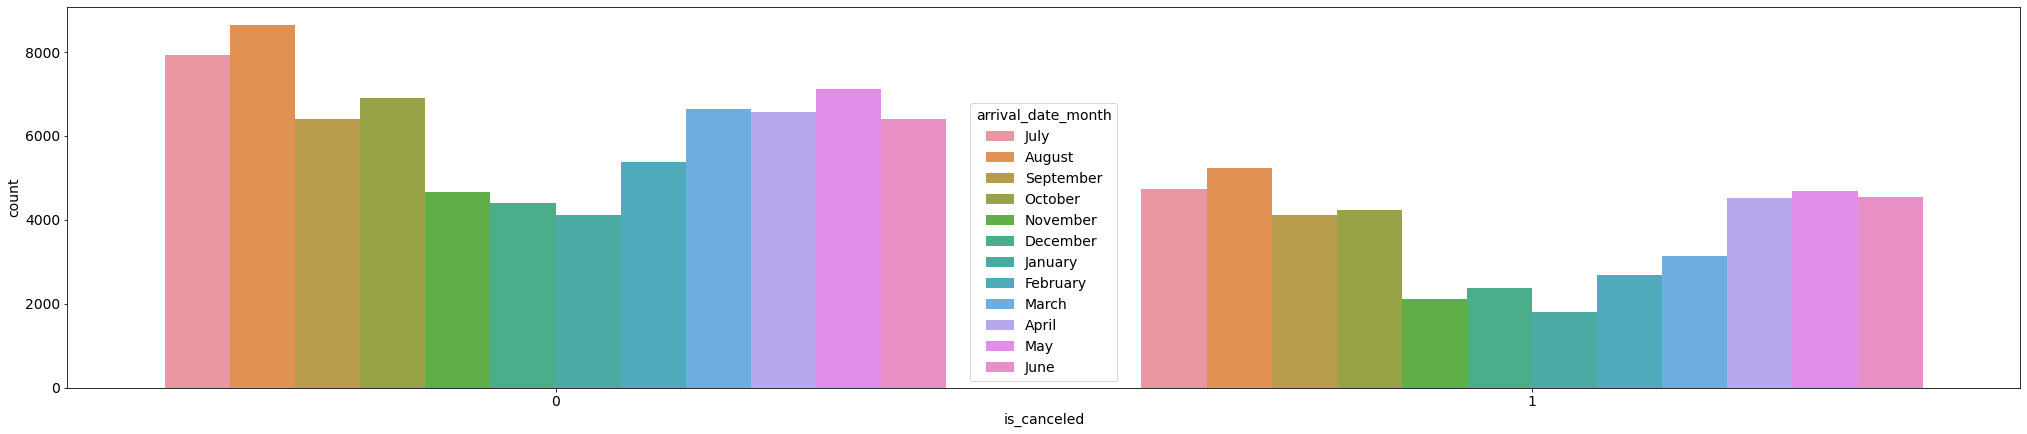

In [183]:
fig=plt.figure(figsize=(35,7))

sns.countplot(data=df,x='is_canceled', hue = 'arrival_date_month') 

4. ¿Cuál es el país en el que hay mayor cantidad de reservas sin bebés?

5. ¿Cuál es el promedio de las noches en semana para los países de Estados Unidos, Brasil y Chile?

R/= EL PROMEDIO EN DICHOS PAISES ES DE 2.19

6. ¿Cómo se relaciona la cantidad de solicitudes especiales en la reserva con el tipo de cliente?

7. Realice un gráfico que permita comparar el segmento con respecto a la cantidad de noches en semana. 

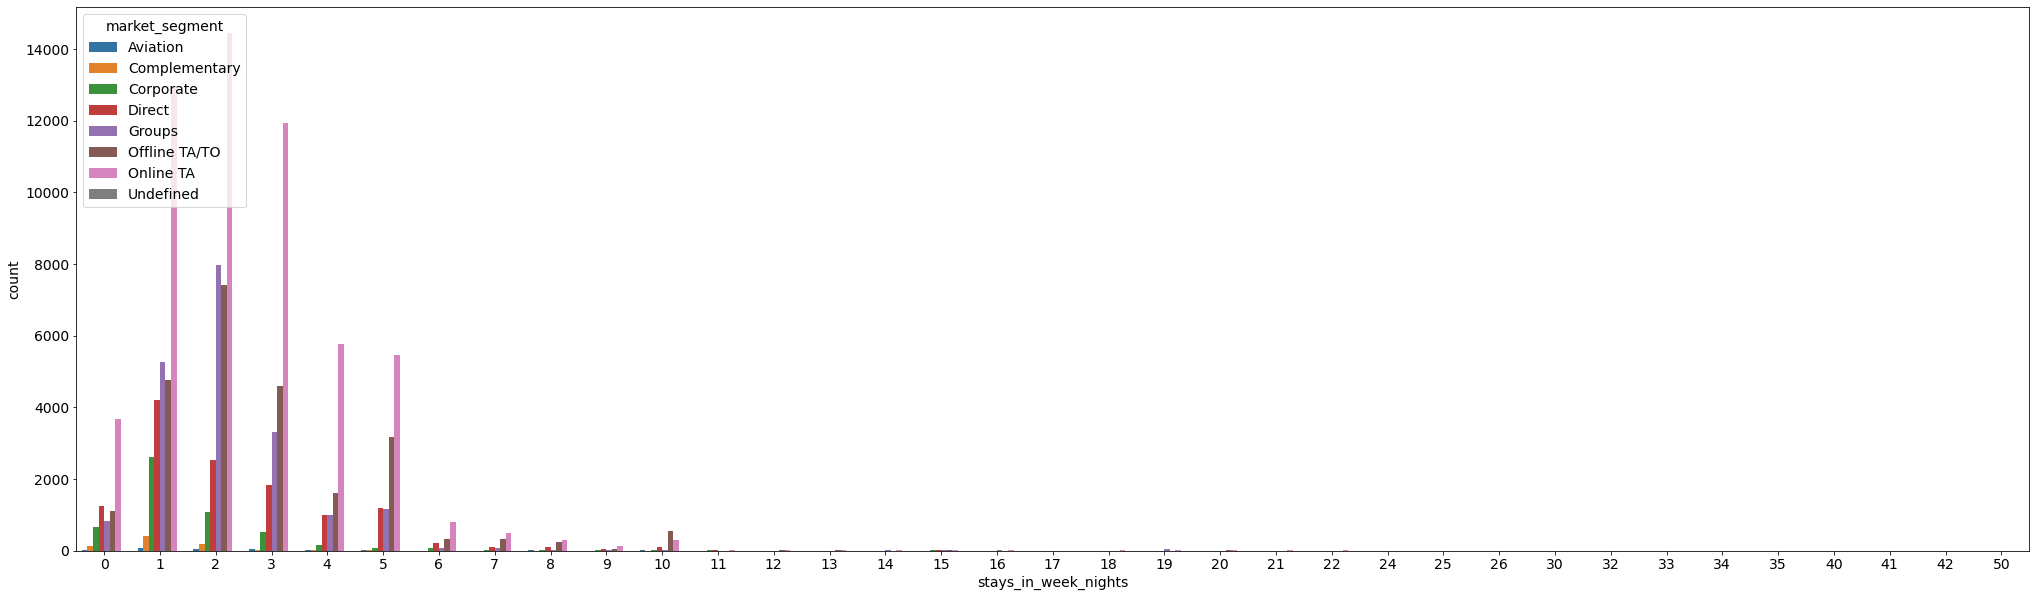

In [196]:
fig=plt.figure(figsize=(35,10))

sns.countplot(data=df,x='stays_in_week_nights', hue = 'market_segment') 


8. ¿Cuántas reservas activas (canceladas) hay de Resort Hotel y cuántas en City Hotel? Mostrar una tabla y gráfico que permita comparar. 

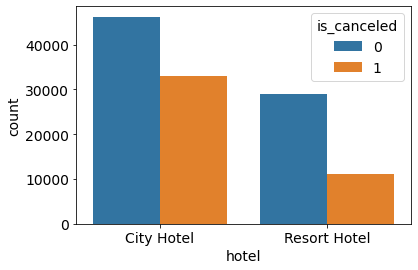

In [164]:
sns.countplot(data=df,x='hotel', hue = 'is_canceled')

9. ¿Cómo se relaciona la tarifa diaria promedio con el tipo de segmento ?


R/= No se evidencia relación estrecha

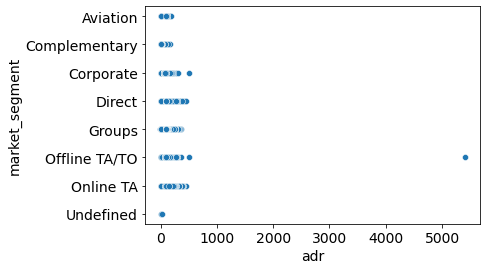

In [198]:
sns.scatterplot(data=df,x='adr',y='market_segment');

10. ¿Cómo se relaciona la tarifa diaria promedio con la cantidad de noches en semana con respecto a las reservas de Resort y de ciudad?

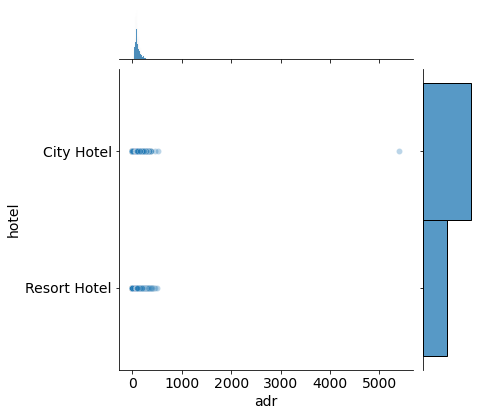

In [199]:
sns.jointplot(data=df,x='adr',y='hotel',alpha=0.3,marker='o');